<div class="alert alert-block alert-success"> 
    <h3><p style="text-align: center;">Задание 1</p></h3>
</div>

Постройте трехмерный график функции, а также график линий уровня с уровнями {1, 5, 10}

In [4]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib.cm as cm

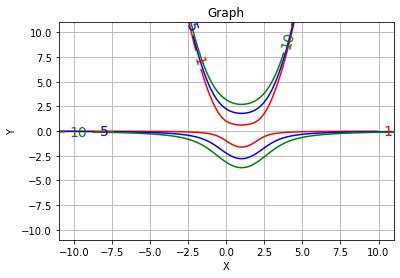

In [21]:
x = np.arange(-11, 11.1, 0.1)
y = np.arange(-11, 11.1, 0.1)
X, Y = np.meshgrid(x, y)
z = Y**2 - X**2*Y + 2*X*Y

fig, ax = plt.subplots()
CS = ax.contour(X, Y,z, [1, 5, 10], colors=['red', 'blue', 'green'])
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('Graph')
plt.xlabel('X')
plt.ylabel('Y')
ax.grid()

<div class="alert alert-block alert-success"> 
    <h3><p style="text-align: center;">Задание 2</p></h3>
</div>

Вычислить вектор градиента и матрицу Гессе для функции в точке М=(2, 1, 1)

In [5]:
import matplotlib.pyplot as plt

x_1 = sym.Symbol('x_1')
x_2 = sym.Symbol('x_2')
x_3 = sym.Symbol('x_3')
y = 2*x_1**3 -3*x_1*x_2 +2*x_2*x_3**2 - x_2**3
y

2*x_1**3 - 3*x_1*x_2 - x_2**3 + 2*x_2*x_3**2

In [37]:
# Градиент

x_1_diff = y.diff(x_1)
x_2_diff = y.diff(x_2)
x_3_diff = y.diff(x_3)

grad = np.array([x_1_diff, x_2_diff, x_3_diff])
grad

array([6*x_1**2 - 3*x_2, -3*x_1 - 3*x_2**2 + 2*x_3**2, 4*x_2*x_3],
      dtype=object)

In [34]:
# Градиент в точке М(2, 1, 1)

grad_M = np.array([grad[0].subs([(x_1, 2), (x_2, 1), (x_3, 1)]),
                   grad[1].subs([(x_1, 2), (x_2, 1), (x_3, 1)]),
                   grad[2].subs([(x_1, 2), (x_2, 1), (x_3, 1)])])

grad_M

array([21, -7, 4], dtype=object)

In [17]:
# Матрица Гессе. Вычислим по составляеющим градиента

hes_matrix = np.array([[x_1_diff.diff(x_1), x_1_diff.diff(x_2), x_1_diff.diff(x_3)],
                       [x_2_diff.diff(x_1), x_2_diff.diff(x_2), x_2_diff.diff(x_3)],
                       [x_3_diff.diff(x_1), x_3_diff.diff(x_2), x_3_diff.diff(x_3)]])

hes_matrix

array([[12*x_1, -3, 0],
       [-3, -6*x_2, 4*x_3],
       [0, 4*x_3, 4*x_2]], dtype=object)

In [92]:
# Матрица Гессе в точке М(2, 1, 1)

hes_matrix_M = np.array([[hes_matrix[0][0].subs([(x_1, 2), (x_2, 1), (x_3, 1)]),
                          hes_matrix[0][1].subs([(x_1, 2), (x_2, 1), (x_3, 1)]),
                          hes_matrix[0][2].subs([(x_1, 2), (x_2, 1), (x_3, 1)])], 
                         
                         [hes_matrix[1][0].subs([(x_1, 2), (x_2, 1), (x_3, 1)]),
                          hes_matrix[1][1].subs([(x_1, 2), (x_2, 1), (x_3, 1)]),
                          hes_matrix[1][2].subs([(x_1, 2), (x_2, 1), (x_3, 1)])],
                         
                         [hes_matrix[2][0].subs([(x_1, 2), (x_2, 1), (x_3, 1)]),
                          hes_matrix[2][1].subs([(x_1, 2), (x_2, 1), (x_3, 1)]),
                          hes_matrix[2][2].subs([(x_1, 2), (x_2, 1), (x_3, 1)])]])

hes_matrix_M

array([[24, -3, 0],
       [-3, -6, 4],
       [0, 4, 4]], dtype=object)

<div class="alert alert-block alert-success"> 
    <h3><p style="text-align: center;">Задание 3</p></h3>
</div>

Для функции из задания 2 с использованием критерия Сильвестра определить, является ли матрица Гессе положительно определенной в точке K=(2, -5, -3)

In [85]:
# Минор 1-го порядка
m_1_det = hes_matrix[0][0].subs([(x_1, 2), (x_2, -5), (x_3, -3)])
m_1_det

24

In [82]:
# Минор 2-го порядка
m_2 = hes_matrix[0:2, 0:2]
m_2_ = np.matrix([[m_2[0][0].subs([(x_1, 2), (x_2, -5), (x_3, -3)]), m_2[0][1].subs([(x_1, 2), (x_2, -5), (x_3, -3)])],
                [m_2[1][0].subs([(x_1, 2), (x_2, -5), (x_3, -3)]), m_2[1][1].subs([(x_1, 2), (x_2, -5), (x_3, -3)])]], dtype='float')

m_2_det = round(np.linalg.det(m_2_))
m_2_det

711

In [86]:
# Минор 3-го порядка
m_3 = np.matrix([[hes_matrix[0][0].subs([(x_1, 2), (x_2, -5), (x_3, -3)]),
                  hes_matrix[0][1].subs([(x_1, 2), (x_2, -5), (x_3, -3)]),
                  hes_matrix[0][2].subs([(x_1, 2), (x_2, -5), (x_3, -3)])], 

                 [hes_matrix[1][0].subs([(x_1, 2), (x_2, -5), (x_3, -3)]),
                  hes_matrix[1][1].subs([(x_1, 2), (x_2, -5), (x_3, -3)]),
                  hes_matrix[1][2].subs([(x_1, 2), (x_2, -5), (x_3, -3)])],

                 [hes_matrix[2][0].subs([(x_1, 2), (x_2, -5), (x_3, -3)]),
                  hes_matrix[2][1].subs([(x_1, 2), (x_2, -5), (x_3, -3)]),
                  hes_matrix[2][2].subs([(x_1, 2), (x_2, -5), (x_3, -3)])]], dtype='float')

m_3_det = round(np.linalg.det(m_3))
m_3_det

-17676

In [91]:
print('Миноры получились равны: ', m_1_det, ',', m_2_det, ',', m_3_det)
print("Так как среди них есть отрицательные значения, но также первый является положительным, знак функции в точке К(2,-5,-3) не определен")

Миноры получились равны:  24 , 711 , -17676
Так как среди них есть отрицательные значения, но также первый является положительным, знак функции в точке К(2,-5,-3) не определен
